<a href="https://colab.research.google.com/github/majidberahman/Monte-Carlo-Simulation-in-python/blob/main/exelrod_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

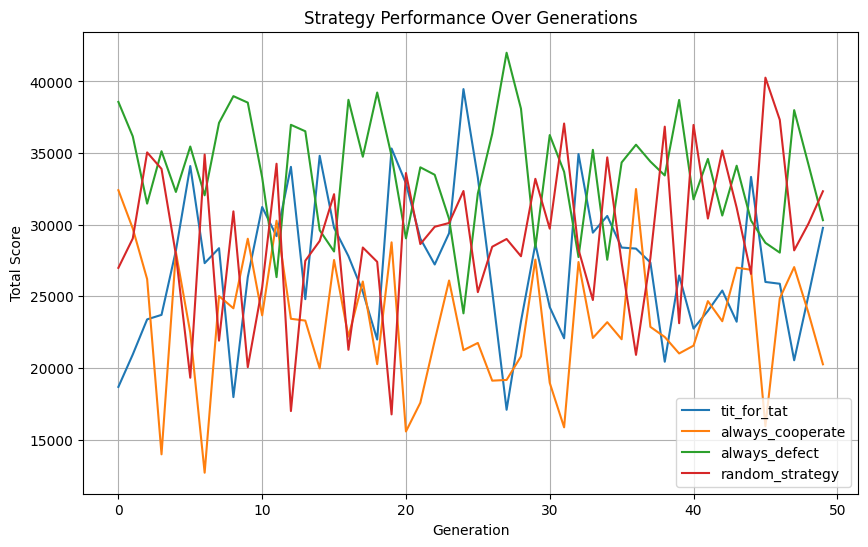

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# تعریف استراتژی‌ها
def tit_for_tat(opponent_history):
    if not opponent_history:
        return 'C'  # Cooperate
    return opponent_history[-1]  # Mimic opponent's last move

def always_cooperate(opponent_history):
    return 'C'

def always_defect(opponent_history):
    return 'D'

def random_strategy(opponent_history):
    return np.random.choice(['C', 'D'])

# تعریف تابع برای شبیه‌سازی یک دور از مسابقه
def play_game(strategy_a, strategy_b, rounds=5):
    history_a = []
    history_b = []
    score_a = 0
    score_b = 0

    for _ in range(rounds):
        move_a = strategy_a(history_b)
        move_b = strategy_b(history_a)
        history_a.append(move_a)
        history_b.append(move_b)

        # محاسبه امتیاز
        if move_a == 'C' and move_b == 'C':
            score_a += 3
            score_b += 3
        elif move_a == 'C' and move_b == 'D':
            score_a += 0
            score_b += 5
        elif move_a == 'D' and move_b == 'C':
            score_a += 5
            score_b += 0
        else:
            score_a += 1
            score_b += 1

    return score_a, score_b, history_a, history_b

# شبیه‌سازی چندین نسل
def simulate_generations(generations=50, population_size=100):
    strategies = [tit_for_tat, always_cooperate, always_defect, random_strategy]
    scores = {strat.__name__: [] for strat in strategies}

    for gen in range(generations):
        population = np.random.choice(strategies, size=population_size)
        total_scores = np.zeros(len(strategies))

        # محاسبه امتیازات
        for i, strat_a in enumerate(population):
            for strat_b in population[i + 1:]:
                score_a, score_b, _, _ = play_game(strat_a, strat_b)
                total_scores[strategies.index(strat_a)] += score_a
                total_scores[strategies.index(strat_b)] += score_b

        # ذخیره نتایج
        for i, strat in enumerate(strategies):
            scores[strat.__name__].append(total_scores[i])

    return scores

# ترسیم نتایج
def plot_results(scores):
    plt.figure(figsize=(10, 6))
    for strat_name, score in scores.items():
        plt.plot(score, label=strat_name)
    plt.title('Strategy Performance Over Generations')
    plt.xlabel('Generation')
    plt.ylabel('Total Score')
    plt.legend()
    plt.grid()
    plt.show()

# اجرای شبیه‌سازی
scores = simulate_generations()
plot_results(scores)
